# ANALIZA FOREX TRŽIŠTA



Forex ili FX tržište, dolazi od engleskih riječi __for__eign i __ex__change, a označava devizno tržište. Dnevni opseg trgovanja na Forex tržištu je 5,5 bilijuna dolara i ono je najlikvidnije i najtransparentnije tržište na svijetu. Osim valutnih parova, moguće je trgovati s naftom, zlatom, srebrom i drugim plemenitim metalima te mnogim drugim financijskim instrumentima. Trgovina se odvija preko platforme, dok je posrednik kompanija čiju platformu koristite.

U ovom radu, na temelju prošlih podataka, pokušat ćemo predvidjeti buduće podatke koristeći SVM regresiju, te ćemo  izračunati korelacije podataka za razne parove parova valuta.
Na kraju ćemo za svaki nacrtati pripadne grafove i donijeti zaključak.



## Analiza podataka


Podaci su preuzeti preko programa _MetaTrader 4 Admiral Markets_ i spremljeni u mapu _Podaci_.
Odabrani podaci prikazuju 30-minutni interval trgovanja glavnim valutama, odnosno sve parove valuta: američki dolar (USD), euro od Europske ekonomske zajednice (EUR), japanski jen (JPY), britanska funta (GBP), švicarski franak (CHF) i australijski dolar (AUD).

Značajke podataka su: 
    1. Time - vremenski period trgovanja (ovdje je 30-minutni period)
    2. Open - cijena prve kupoprodajne operacije u određenom vremenskom periodu
    3. High - najveća cijena parova valuta u zadanom intervalu
    4. Low - najmanja cijena parova valuta u zadanom intervalu
    5. Close - cijena zadnje transakcije izvršene u nekom određenom odsječku vremena
    6. Volume - broj transakcija u zadanom intervalu



In [1]:
import pandas as pd

podaci = ['Podaci/AUDJPY30.csv','Podaci/EURGBP30.csv','Podaci/GBPUSD30.csv','Podaci/EURUSD30.csv',
          'Podaci/USDJPY30.csv','Podaci/GBPAUD30.csv','Podaci/GBPJPY30.csv','Podaci/AUDCHF30.csv',
          'Podaci/CHFJPY30.csv','Podaci/EURAUD30.csv','Podaci/EURCHF30.csv','Podaci/EURJPY30.csv',
          'Podaci/USDCHF30.csv','Podaci/AUDUSD30.csv','Podaci/GBPCHF30.csv']

names = ['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume']

tablice = [pd.read_csv(podatak, names = names) for podatak in podaci]
tabliceNazivi = [x[7:-6] for x in podaci]

tabliceDict = {naziv : tabl for naziv, tabl in zip(tabliceNazivi, tablice) }

del tablice
del tabliceNazivi

AUDJPY = tabliceDict["AUDJPY"]
EURGBP = tabliceDict["EURGBP"]
GBPUSD = tabliceDict["GBPUSD"]
EURUSD = tabliceDict["EURUSD"]
USDJPY = tabliceDict["USDJPY"]
GBPAUD = tabliceDict["GBPAUD"]
GBPJPY = tabliceDict["GBPJPY"]
AUDCHF = tabliceDict["AUDCHF"]
CHFJPY = tabliceDict["CHFJPY"]
EURAUD = tabliceDict["EURAUD"]
EURCHF = tabliceDict["EURCHF"]
EURJPY = tabliceDict["EURJPY"]
USDCHF = tabliceDict["USDCHF"]
AUDUSD = tabliceDict["AUDUSD"]
GBPCHF = tabliceDict["GBPCHF"]

AUDCHF

,Date,Time,Open,High,Low,Close,Volume
0,1993.05.14,00:00,1.01940,1.01940,1.01940,1.01940,1
1,1993.05.17,00:00,1.02950,1.02950,1.02950,1.02950,1
2,1993.05.18,00:00,1.02480,1.02480,1.02480,1.02480,1
3,1993.05.19,00:00,1.01950,1.01950,1.01950,1.01950,1
4,1993.05.20,00:00,1.02140,1.02140,1.02140,1.02140,1
5,1993.05.21,00:00,1.02100,1.02100,1.02100,1.02100,1
6,1993.05.24,00:00,1.02140,1.02140,1.02140,1.02140,1
7,1993.05.25,00:00,1.02170,1.02170,1.02170,1.02170,1
8,1993.05.26,00:00,1.01630,1.01630,1.01630,1.01630,1
9,1993.05.27,00:00,0.99140,0.99140,0.99140,0.99140,1


In [2]:
!head Podaci/EURUSD30.csv
print("\n")
!head Podaci/AUDCHF30.csv

1971.01.04,00:00,0.53690,0.53690,0.53690,0.53690,1
1971.01.05,00:00,0.53660,0.53660,0.53660,0.53660,1
1971.01.06,00:00,0.53650,0.53650,0.53650,0.53650,1
1971.01.07,00:00,0.53680,0.53680,0.53680,0.53680,1
1971.01.08,00:00,0.53710,0.53710,0.53710,0.53710,1
1971.01.11,00:00,0.53710,0.53710,0.53710,0.53710,1
1971.01.12,00:00,0.53710,0.53710,0.53710,0.53710,1
1971.01.13,00:00,0.53730,0.53730,0.53730,0.53730,1
1971.01.14,00:00,0.53720,0.53720,0.53720,0.53720,1
1971.01.15,00:00,0.53760,0.53760,0.53760,0.53760,1


1993.05.14,00:00,1.01940,1.01940,1.01940,1.01940,1
1993.05.17,00:00,1.02950,1.02950,1.02950,1.02950,1
1993.05.18,00:00,1.02480,1.02480,1.02480,1.02480,1
1993.05.19,00:00,1.01950,1.01950,1.01950,1.01950,1
1993.05.20,00:00,1.02140,1.02140,1.02140,1.02140,1
1993.05.21,00:00,1.02100,1.02100,1.02100,1.02100,1
1993.05.24,00:00,1.02140,1.02140,1.02140,1.02140,1
1993.05.25,00:00,1.02170,1.02170,1.02170,1.02170,1
1993.05.26,00:00,1.01630,1.01630,1.01630,1.01630,1
1993.05.27,00:00,0.99140,0.99

In [3]:
if(AUDCHF["Time"] != "00:00").any():
    print(AUDCHF.loc[AUDCHF["Time"] != "00:00", :].head(1))  
print("\nNpr. Za par AUD-CHF datum početka trgovanja nije isti kao i za par EUR-USD.\n\t30-minutni interval trgovanja bilježi se od 1.5.2007.\n")

            Date   Time    Open    High     Low   Close  Volume
3398  2007.05.01  00:30  1.0015  1.0015  1.0009  1.0009      70

Npr. Za par AUD-CHF datum početka trgovanja nije isti kao i za par EUR-USD.
	30-minutni interval trgovanja bilježi se od 1.5.2007.



Zbog različitih početaka trgovanja raznim valutama usredotočit ćemo se na podatke koji su dobiveni u jednakim vremenskim intervalima kako bismo ih mogli uspoređivati. Radi "ljepšeg" grafičkog prikaza analizirat ćemo podatke nastale u razdoblju od 26.3.2018. do 4.4.2018.


In [4]:
AUDCHF.describe()

,Open,High,Low,Close,Volume
count,137595.000000,137595.000000,137595.000000,137595.000000,137595.000000
mean,0.864556,0.865391,0.863711,0.864555,1470.730295
std,0.103995,0.104081,0.103911,0.103994,1174.613547
min,0.110300,0.110560,0.024400,0.110280,1.000000
25%,0.758770,0.759390,0.758150,0.758790,633.000000
50%,0.869300,0.870300,0.868310,0.869280,1242.000000
75%,0.957610,0.958470,0.956730,0.957600,2020.000000
max,1.175900,1.176200,1.162900,1.174600,31817.000000


In [5]:
from datetime import datetime

toDateTime = lambda x : datetime.strptime(x, '%Y.%m.%d  %H:%M')

AUDCHF['Date&Time'] = AUDCHF['Date'].map(str) + " " + AUDCHF['Time'].map(str)
AUDCHF['Date&Time'] = [toDateTime(x) for x in AUDCHF['Date&Time']]
del AUDCHF['Date'], AUDCHF['Time']

# radi samo kad Kernel -> Restart & Run All
AUDCHF.head()

,Open,High,Low,Close,Volume,Date&Time
0,1.0194,1.0194,1.0194,1.0194,1,1993-05-14
1,1.0295,1.0295,1.0295,1.0295,1,1993-05-17
2,1.0248,1.0248,1.0248,1.0248,1,1993-05-18
3,1.0195,1.0195,1.0195,1.0195,1,1993-05-19
4,1.0214,1.0214,1.0214,1.0214,1,1993-05-20


In [6]:
def order(frame,var):
    varlist =[w for w in frame.columns if w not in var]
    frame = frame[var+varlist]
    return frame
AUDCHF = order(AUDCHF,['Date&Time'])
AUDCHF.head()

,Date&Time,Open,High,Low,Close,Volume
0,1993-05-14,1.0194,1.0194,1.0194,1.0194,1
1,1993-05-17,1.0295,1.0295,1.0295,1.0295,1
2,1993-05-18,1.0248,1.0248,1.0248,1.0248,1
3,1993-05-19,1.0195,1.0195,1.0195,1.0195,1
4,1993-05-20,1.0214,1.0214,1.0214,1.0214,1


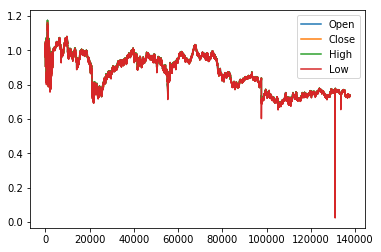

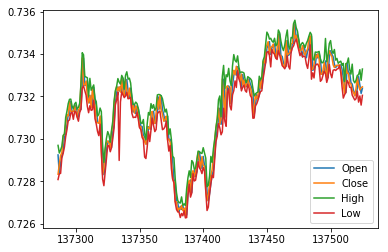

In [7]:
%matplotlib inline
AUDCHF[['Open', 'Close', 'High', 'Low']].plot()

AUDCHF = AUDCHF[AUDCHF['Date&Time'] >= "2018-03-25 00:00:00"]
AUDCHF = AUDCHF[AUDCHF['Date&Time'] <= "2018-04-01 00:00:00"]

AUDCHF[['Open', 'Close', 'High', 'Low']].plot()


TO DO
* graf za sve valute (Open ili Close vrijednosti; Volume)

* pripremiti podatke za SVM
- spojiti sve tablice u jednu veliku tablicu s ključem _Date&Time_

## Korelacije valutnih parova

__Valutna korelacija__ je mjera uzajamne ovisnosti dvaju valutnih parova. __Koeficijent korelacije__ predstavljen je u decimalnom formatu i varira od +1.0 do -1.0.
Korelacija +1 (pozitivno, izravno) znači da se dva valutna para premještaju 100% vremena u jednom smjeru.
Korelacija -1 (negativno, inverzno) znači da se dva para 100% vremena kreću u suprotnim smjerovima.
Nula (0) korelacija znači da dva para ne ovise jedni o drugima.
Korelacija valutnih parova ovisi o stanju na financijskom tržištu, a to znači da se može mijenjati periodično.

TO DO 
* korelacija za svaki par parova valuta
* grafički prikaz

## Predviđanje kretanja valuta korištenjem metode potpornih vektora (SVM)

_Metoda potpornih vektora_ (__SVM__) je skup metoda za nadzirano ucenje korišten za klasifikaciju, regresiju i detekciju outlier-a. SVM traži optimalnu ravninu (hiperravninu) razdvajanja koja maksimizira marginu razdvajanja. (_Margina_ je udaljenost između “kritičnih” točaka neke klase najbliže blizu plohi razdvajanja.)

U regresiji SVM-a potrebno je procijeniti funkcionalnu ovisnost zavisne varijable $y$ na skupu nezavisnih varijabli $x$. Pretpostavljamo da je odnos između nezavisnih i zavisnih varijabli određen determinističkom funkcijom $f$ uz dodatak nekog šuma.

Podatke dijelimo na _trening_ skup i _test_ skup. Trening skup podataka služi za učenje SVM algoritma u svrhu što bolje klasifikacije podataka. Za razliku od trening skupa, test skup služi za mjerenje performansi modela kojeg smo trenirali.

U našem slučaju podatke ćemo podijeliti tako da se 80% podataka koristi za treniranje, a 20% za testiranje.

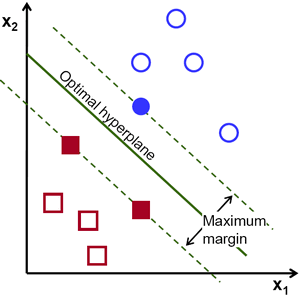

In [10]:
from IPython.display import Image
Image('https://docs.opencv.org/2.4/_images/optimal-hyperplane.png')

### Matematička formulacija SVM regresije

$$y = f(x) + noise$$

Potrebno je pronaći odgovarajući oblik funkcije $f$ koja može ispravno predvidjeti nova stanja koja SVM-u nisu bila poznata od ranije. To se može postići treniranjem SVM modela na jednostavnom skupu (_trening skup_), a taj proces osim klasifikacije uključuje sekvencijalnu optimizaciju funkcije pogreške. Ovisno kako definiramo funkciju pogreške, postoje dva tipa SVM algoritma: 

* Za trening vektore $x_i \in {\rm I\!R}^p, i = 1,...,n$ i vektor $ y \in \{1, -1\}^n $, SVM rješava problem minimizacije funkcije pogreške
$$\frac{1}{2}w^Tw + C \sum_{i=1}^n \zeta_i + C \sum_{i=1}^n \zeta_i^\boldsymbol{\cdot},$$
gdje je $$w^T\Phi(x_i) + b - y_i \leq \varepsilon + \zeta_i^\boldsymbol{\cdot},$$
$$y_i - w^T\Phi(x_i) - b_i \leq \varepsilon + \zeta_i$$ 
$$\zeta_i^\boldsymbol{\cdot},\zeta_i \geq 0, i = 1,...,n,$$
dok je $\Phi$ funkcija koja mapira trening vektor u višedimenzionalni prostor. $C$ je konstanta kapaciteta, $w$ je vektor koeficijenata, $b$ je konstanta, $\zeta_i$ predstavlja parametre za rukovanje neodvojivim podacima (ulazima). Indeks $i$ označava $N$ trening stanja.

* Za ovaj SVM algoritam funkcija pogreške dana je s
$$\frac{1}{2}w^Tw - C\Big(\nu\varepsilon + \frac{1}{N} \sum_{i=1}^n (\zeta_i + \zeta_i^\boldsymbol{\cdot})\Big),$$
gdje je $$w^T\Phi(x_i) + b - y_i \leq \varepsilon + \zeta_i,$$
$$y_i - (w^T\Phi(x_i) + b_i) \leq \varepsilon + \zeta_i^\boldsymbol{\cdot}$$ 
$$\zeta_i^\boldsymbol{\cdot},\zeta_i \geq 0, i = 1,...,n, \varepsilon \geq 0.$$

Postoji više vrsta _krenela_ (jezgri) koji se mogu koristiti u SVM algoritmima. Uključuju linearne, polinomialne, radialne (RBF) i sigmoidalne funkcije.
$$K(X_i, X_j)=\Bigg\{ X_i\boldsymbol{\cdot}X_j\Bigg\},$$
gdje _kernel_ funkcija 
$$K(X_i, X_j)=\Phi(X_i)\boldsymbol{\cdot}\Phi(X_j)$$ 
predstavlja skalarni produkt ulaznih podataka mapiranih u višedimenzionalni prostor transformacijom $\Phi$.

TO DO

## Zaključak

TO DO

## Literatura

https://www.fortrade.eu/edukacija/sto-je-forex/

http://www.forex-internet.com/forex/rijecnik_pojmova.htm

https://www.fortrade.eu/edukacija/forex-rijecnik/

https://hr.id-forex.com/correlation-in-forex-market-application-advice

https://web.math.pmf.unizg.hr/nastava/su/index.php/download_file/-/view/174/

http://www.statsoft.com/Textbook/Support-Vector-Machines